# 🧠 Lab: Linear Regression with Gradient Descent

This notebook walks through how to build a simple linear regression model using gradient descent *from scratch*.


# Linear Regression Overview:
Linear regression is a method used to model the relationship between a dependent variable
𝑦
y and one or more independent variables
𝑋
X. The general form of the linear regression equation for a single feature (one independent variable) is:

𝑦
=
𝑤
⋅
𝑋
+
𝑏
y=w⋅X+b

Where:

𝑦
y is the predicted output (dependent variable).

𝑋
X is the input data (independent variable).

𝑤
w is the weight (also called the slope or coefficient) of the model.

𝑏
b is the bias (also called the intercept) of the model.


What is
𝑤
w (Weight / Slope)?

The weight
𝑤
w determines the slope of the line in linear regression. It tells you how much the predicted output
𝑦
y will change when the input feature
𝑋
X changes.

If
𝑤
w is large: A small change in
𝑋
X will result in a large change in
𝑦
y.

If
𝑤
w is small: A small change in
𝑋
X will result in a small change in
𝑦
y.


In simpler terms,
𝑤
w controls the steepness of the line that best fits the data.

What is
𝑏
b (Bias / Intercept)?
The bias
𝑏
b represents the intercept of the line. It determines where the line crosses the y-axis when
𝑋
=
0
X=0.

If
𝑏
b is positive, the line will cross above the origin on the y-axis.

If
𝑏
b is negative, the line will cross below the origin on the y-axis.

The bias is important because it shifts the line up or down, allowing the model to better fit the data.



Putting It Together:
In the equation
𝑦
=
𝑤
⋅
𝑋
+
𝑏
y=w⋅X+b:

𝑤
w controls how much the predicted value
𝑦
y changes as
𝑋
X changes (i.e., the slope of the line).

𝑏
b shifts the line up or down, adjusting the prediction when
𝑋
=
0
X=0.

Example:
Suppose you have the equation
𝑦
=
2
𝑋
+
1
y=2X+1:

𝑤
=
2
w=2 means that for every 1-unit increase in
𝑋
X,
𝑦
y will increase by 2.

𝑏
=
1
b=1 means that when
𝑋
=
0
X=0,
𝑦
y will be 1 (the line crosses the y-axis at 1).

During Training (Gradient Descent):
When you train a linear regression model using gradient descent, the goal is to adjust
𝑤
w and
𝑏
b so that the line fits the data as well as possible:

𝑤
w is adjusted to minimize the difference between the predicted values and the actual values.

𝑏
b is adjusted to make sure the line is in the right position to best fit the data.

Why are
𝑤
w and
𝑏
b Important?
The weights and bias are the parameters that define the linear model. By learning the right values for
𝑤
w and
𝑏
b, the model can make accurate predictions on new, unseen data.

Gradient descent helps find the best values for
𝑤
w and
𝑏
b by iteratively adjusting them to minimize the error (cost).

In summary:

𝑤
w (weight) controls the slope of the line.

𝑏
b (bias) controls where the line intersects the y-axis (its vertical shift).

# Synthetic Data Creation:
The lab starts by generating synthetic data for a simple linear regression task:

The independent variable
𝑋
X is generated randomly.

A true slope (true_slope = 3.5) and intercept (true_intercept = 1.2) are defined, and some random noise is added to the data to simulate real-world data variability.

The dependent variable
𝑦
y is calculated using the linear equation
𝑦
=
true_slope
×
𝑋
+
true_intercept
+
noise
y=true_slope×X+true_intercept+noise.

Plot the Data: A scatter plot is created to visualize the generated data.
[link text](https://)

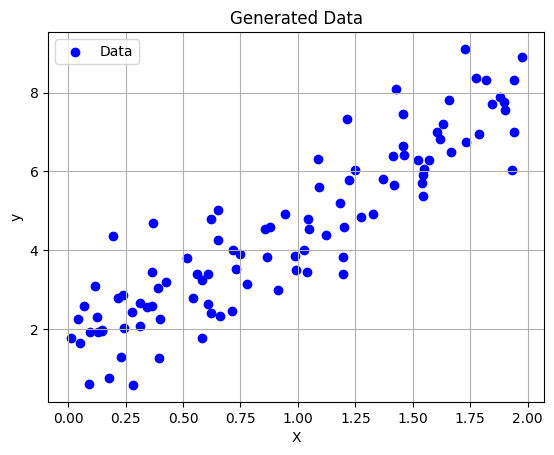

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
true_slope = 3.5
true_intercept = 1.2
noise = np.random.randn(100, 1)

y = true_slope * X + true_intercept + noise

# Plot the data
plt.scatter(X, y, color='blue', label='Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data')
plt.legend()
plt.grid(True)
plt.show()

# Cost Function
Initialization of Weights: The model starts with initial weights
𝑤
=
0.0
w=0.0 (slope) and
𝑏
=
0.0
b=0.0 (intercept).

Compute Cost: The cost function (or loss function) measures the error between the predicted values and the actual values. This is the mean squared error (MSE) cost function, calculated as:

𝐽
(
𝑤
,
𝑏
)
=
1
2
𝑚
∑
𝑖
=
1
𝑚
(
𝑦
(
𝑖
)
−
𝑦
^
(
𝑖
)
)
2
J(w,b)=
2m
1
​
  
i=1
∑
m
​
 (y
(i)
 −
y
^
​
  
(i)
 )
2

Where:

𝑦
(
𝑖
)
y
(i)
  is the actual value.

𝑦
^
(
𝑖
)
y
^
​
  
(i)
  is the predicted value.


In [ ]:
# Initialize weights
w = 0.0  # slope
b = 0.0  # intercept

# Cost function
def compute_cost(X, y, w, b):
    m = len(X)
    predictions = w * X + b
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

# Gradient Descent
Compute Gradient: The gradients of the cost function with respect to the weights are calculated. These gradients tell us the direction in which the weights need to be adjusted.

Gradient of
𝑤
w (slope):
𝑑
𝑤
=
1
𝑚
∑
(
𝑦
^
−
𝑦
)
×
𝑋
dw=
m
1
​
 ∑(
y
^
​
 −y)×X

Gradient of
𝑏
b (intercept):
𝑑
𝑏
=
1
𝑚
∑
(
𝑦
^
−
𝑦
)
db=
m
1
​
 ∑(
y
^
​
 −y)

Update Weights: The weights are updated using the gradient descent algorithm:

𝑤
:
=
𝑤
−
learning_rate
×
𝑑
𝑤
w:=w−learning_rate×dw
𝑏
:
=
𝑏
−
learning_rate
×
𝑑
𝑏
b:=b−learning_rate×db
This is done for a set number of iterations, with the learning rate controlling how much the weights are adjusted at each step.


In [ ]:
# Gradient Descent
def compute_gradient(X, y, w, b):
    m = len(X)
    predictions = w * X + b
    error = predictions - y
    dw = (1 / m) * np.sum(error * X)
    db = (1 / m) * np.sum(error)
    return dw, db

def gradient_descent(X, y, w, b, learning_rate, iterations):
    cost_history = []
    for i in range(iterations):
        dw, db = compute_gradient(X, y, w, b)
        w -= learning_rate * dw
        b -= learning_rate * db
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
        if i % 10 == 0:
            print(f"Iteration {i:3}: Cost={cost:.4f} | w={w:.4f}, b={b:.4f}")
    return w, b, cost_history

# Training the Model
The gradient descent function runs for 100 iterations and outputs the updated values of
𝑤
w and
𝑏
b, along with the cost after each iteration.

After training, the final weights
𝑤
w and
𝑏
b are printed. These values should closely match the true slope and intercept used to generate the data.

In [ ]:
# Train the model
learning_rate = 0.1
iterations = 100

w_final, b_final, cost_history = gradient_descent(X, y, w, b, learning_rate, iterations)

print(f"\nFinal weights: w = {w_final:.4f}, b = {b_final:.4f}")

Iteration   0: Cost=7.9652 | w=0.5368, b=0.4490
Iteration  10: Cost=0.5473 | w=2.4656, b=1.9243
Iteration  20: Cost=0.4544 | w=2.7405, b=1.9752
Iteration  30: Cost=0.4391 | w=2.8385, b=1.9000
Iteration  40: Cost=0.4287 | w=2.9078, b=1.8250
Iteration  50: Cost=0.4213 | w=2.9650, b=1.7606
Iteration  60: Cost=0.4161 | w=3.0130, b=1.7063
Iteration  70: Cost=0.4124 | w=3.0534, b=1.6605
Iteration  80: Cost=0.4097 | w=3.0875, b=1.6219
Iteration  90: Cost=0.4079 | w=3.1163, b=1.5894

Final weights: w = 3.1382, b = 1.5645


# Plotting the Cost and Learned Line
Cost over Iterations: A plot is generated showing how the cost decreases over the iterations of training. This shows that the model is learning and improving over time.

Learned Line: The final learned line is plotted alongside the original data points. This shows how well the model has fit the data.

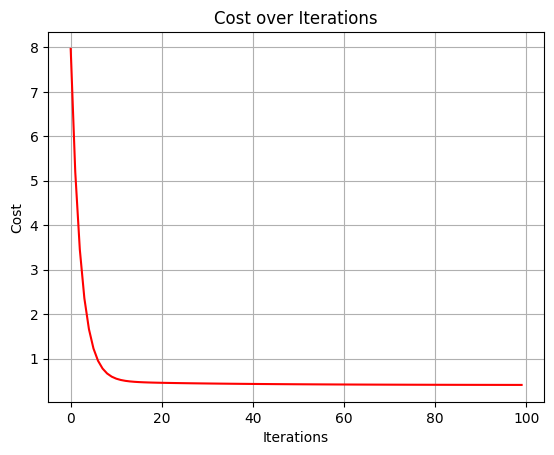

In [9]:
# Plot cost over iterations
plt.plot(range(iterations), cost_history, 'r')
plt.title("Cost over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

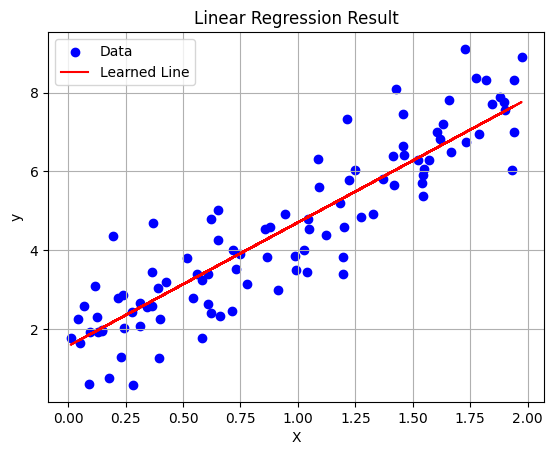

In [ ]:
# Plot the learned line
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, w_final * X + b_final, color='red', label='Learned Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Result')
plt.legend()
plt.grid(True)
plt.show()

# Making Predictions
A function is defined to make predictions based on the final learned model parameters
𝑤
w and
𝑏
b.

Predictions are made for new values of
𝑋
X (e.g., 0.5, 1.5, 2.0), and the corresponding predicted
𝑦
y-values are printed.

In [ ]:
# Predict
def predict(x):
    return w_final * x + b_final

new_x = np.array([[0.5], [1.5], [2.0]])
predictions = predict(new_x)

for i in range(len(new_x)):
    print(f"Prediction for x = {new_x[i][0]}: y = {predictions[i][0]:.2f}")

Prediction for x = 0.5: y = 3.13
Prediction for x = 1.5: y = 6.27
Prediction for x = 2.0: y = 7.84


# Summary:
This notebook walks through the process of building a linear regression model using gradient descent:

It generates synthetic data for linear regression.

Implements the cost function (mean squared error).

Uses gradient descent to minimize the cost and find the best-fitting line.

Visualizes the results and makes predictions using the learned model.

By the end of the lab, you will have a basic understanding of how gradient descent works and how it can be used to fit a linear regression model to data.